# Dataset from google drive

In [0]:
!pip install --upgrade -q gspread


from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open our new sheet and read some data.
worksheet = gc.open('Google_Stock_Price_Train').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Open our new sheet and read some data.
worksheet_1 = gc.open('Google_Stock_Price_Test').sheet1

# get_all_values gives a list of rows.
rows_1 = worksheet_1.get_all_values()

# Data Preprocessing

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_train = pd.DataFrame(data=rows[1:], columns=rows[0], dtype='float32')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.250000,332.829987,324.970001,663.590027,7380500.0
1,1/4/2012,331.269989,333.869995,329.079987,666.450012,5749400.0
2,1/5/2012,329.829987,330.750000,326.890015,657.210022,6590300.0
3,1/6/2012,328.339996,328.769989,323.679993,648.239990,5405900.0
4,1/9/2012,322.040009,322.290009,309.459991,620.760010,11688800.0
5,1/10/2012,313.700012,315.720001,307.299988,621.429993,8824000.0
6,1/11/2012,310.589996,313.519989,309.399994,624.250000,4817800.0
7,1/12/2012,314.429993,315.260010,312.079987,627.919983,3764400.0
8,1/13/2012,311.959991,312.299988,309.369995,623.280029,4631800.0
9,1/17/2012,314.809998,314.809998,311.670013,626.859985,3832800.0


## Feature scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

In [0]:
training_set_sc = sc.fit_transform(training_set) 

In [6]:
training_set_sc.shape

(1258, 1)

## Creating data structure with 60 timespaces and 1 output

In [0]:
x_train, y_train = [], []
for i in range(60, 1258):
    x_train.append(training_set_sc[i-60:i, 0])
    y_train.append(training_set_sc[i, 0])

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train.shape

(1198, 60)

## Reshaping

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [11]:
x_train.shape

(1198, 60, 1)

# Building RNN

## importing keras

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## building model

In [0]:
model = Sequential()

In [0]:
model.add(LSTM(units = 50, 
               return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [0]:
model.add(Dense(units = 1))

In [0]:
model.compile(optimizer = 'adam', 
              loss="mean_squared_error")

In [22]:
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0609
Epoch 2/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0077
Epoch 3/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0067
Epoch 5/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0061
Epoch 6/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0055
Epoch 8/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0055
Epoch 9/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0060
Epoch 10/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

# Predicting

## test data

In [0]:
dataset_test = pd.DataFrame(data=rows_1[1:], columns=rows_1[0], dtype='float32')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat([dataset_train['Open'], dataset_test['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [0]:
predicted_stock_prices = model.predict(x_test)

In [0]:
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

# Visualizing

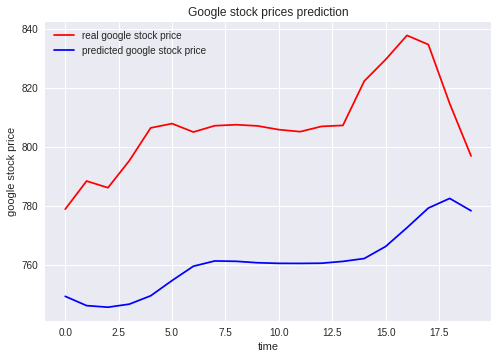

In [32]:
plt.plot(real_stock_price, color='red', label = 'real google stock price')
plt.plot(predicted_stock_prices, color='blue', label = 'predicted google stock price')
plt.title('Google stock prices prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()